In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 50)

import networkx as nx
from networkx.algorithms import bipartite

import pycountry_convert

import matplotlib.pyplot as plt
import plotly
from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.io as pio

init_notebook_mode(connected=True)

# Data preparation

## H2020

In [2]:
h2020_projects = pd.read_csv('../data/processed/h2020-projects.csv', delimiter='\t', header=None)
h2020_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# h2020_projects.head()

In [3]:
h2020_organisations = pd.read_csv('../data/processed/h2020-organisations.csv', delimiter='\t', header=None)
h2020_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                               'short_name', 'legal_name', 'city', 'country', 'contribution']
# h2020_organisations.head()

## FP7

In [4]:
fp7_projects = pd.read_csv('../data/processed/fp7-projects.csv', delimiter='\t', header=None)
fp7_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# fp7_projects.head()

In [5]:
fp7_organisations = pd.read_csv('../data/processed/fp7-organisations.csv', delimiter='\t', header=None)
fp7_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
# fp7_organisations.head()

## FP6

In [6]:
fp6_projects = pd.read_csv('../data/processed/fp6-projects.csv', delimiter='\t', header=None)
fp6_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# fp6_projects.head()

In [7]:
fp6_organisations = pd.read_csv('../data/processed/fp6-organisations.csv', delimiter='\t', header=None)
fp6_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
# fp6_organisations.head()

## FP5

In [8]:
fp5_projects = pd.read_csv('../data/processed/fp5-projects.csv', delimiter='\t', header=None)
fp5_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# fp5_projects.head()

In [9]:
fp5_organisations = pd.read_csv('../data/processed/fp5-organisations.csv', delimiter='\t', header=None)
fp5_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
# fp5_organisations.head()

## FP4

In [10]:
fp4_projects = pd.read_csv('../data/processed/fp4-projects.csv', delimiter='\t', header=None)
fp4_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# fp4_projects.head()

In [11]:
fp4_organisations = pd.read_csv('../data/processed/fp4-organisations.csv', delimiter='\t', header=None)
fp4_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
# fp4_organisations.head()

## FP3

In [12]:
fp3_projects = pd.read_csv('../data/processed/fp3-projects.csv', delimiter='\t', header=None)
fp3_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# fp3_projects.head()

In [13]:
fp3_organisations = pd.read_csv('../data/processed/fp3-organisations.csv', delimiter='\t', header=None)
fp3_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
# fp3_organisations.head()

## FP2

In [14]:
fp2_projects = pd.read_csv('../data/processed/fp2-projects.csv', delimiter='\t', header=None)
fp2_projects.columns = ['rcn', 'reference', 'acronym', 'title', 'total_cost', 'ec_contribution',
                    'teaser', 'objective', 'start', 'end', 'status']
# fp2_projects.head()

In [15]:
fp2_organisations = pd.read_csv('../data/processed/fp2-organisations.csv', delimiter='\t', header=None)
fp2_organisations.columns = ['rcn', 'org_id', 'org_rcn', 'order', 'org_type',
                            'short_name', 'legal_name', 'city', 'country', 'contribution']
# fp2_organisations.head()

# Data analysis

In [24]:
all_organisations = pd.concat([h2020_organisations, fp7_organisations, fp6_organisations])
all_projects = pd.concat([h2020_projects, fp7_projects, fp6_projects])

In [25]:
project_periods = all_projects[['rcn', 'start', 'end']]

In [26]:
all_organisations = pd.merge(all_organisations, project_periods, left_on='rcn', right_on='rcn')
all_organisations.head()

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution,start,end
0,195398,999835843.0,1905890.0,1,coordinator,ucy,university of cyprus,nicosia,cy,151648.8,2015-05-01,2017-04-30
1,199945,998929669.0,1908315.0,16,participant,upd,universite paris dauphine,paris cedex 16,fr,45000.0,2016-05-01,2020-04-30
2,199945,989393987.0,1931502.0,5,participant,efm,entente pour la forêt méditerranéenne,gardanne,fr,36000.0,2016-05-01,2020-04-30
3,199945,916450860.0,2791186.0,14,participant,uca,universite clermont auvergne,clermont-ferrand,fr,45000.0,2016-05-01,2020-04-30
4,199945,999974650.0,1906418.0,9,participant,unige,universite de geneve,geneve,ch,40500.0,2016-05-01,2020-04-30


In [105]:
all_organisations = all_organisations[(all_organisations.rcn.notna() &
                                     all_organisations.org_id.notna() &
                                     all_organisations.start.notna() &
                                     all_organisations.end.notna())]

In [111]:
all_organisations.describe(include='all')

,rcn,org_id,org_rcn,order,org_type,short_name,legal_name,city,country,contribution,start,end
count,236213.000000,2.362130e+05,2.361720e+05,236213.000000,236213,234956,236207,236188,236204,2.220570e+05,236213,236213
unique,NaN,NaN,NaN,NaN,5,41168,48659,13096,190,NaN,1648,2293
top,NaN,NaN,NaN,NaN,participant,cnrs,centre national de la recherche scientifique cnrs,paris,de,NaN,2017-01-01,2018-12-31
freq,NaN,NaN,NaN,NaN,181569,2278,2579,7342,30601,NaN,6071,5103
mean,146848.731530,9.861948e+08,2.032069e+06,11.307489,NaN,NaN,NaN,NaN,NaN,3.724532e+05,NaN,NaN
std,53450.597238,2.777661e+07,2.586787e+05,58.101905,NaN,NaN,NaN,NaN,NaN,1.088641e+06,NaN,NaN
min,71137.000000,1.050000e+02,1.905548e+06,-999.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN
25%,97715.000000,9.881460e+08,1.906232e+06,2.000000,NaN,NaN,NaN,NaN,NaN,9.612500e+04,NaN,NaN
50%,110092.000000,9.995868e+08,1.910169e+06,5.000000,NaN,NaN,NaN,NaN,NaN,2.150000e+05,NaN,NaN
75%,203712.000000,9.999324e+08,2.001970e+06,10.000000,NaN,NaN,NaN,NaN,NaN,4.167500e+05,NaN,NaN


In [106]:
from datetime import datetime
def get_edge_labels(start, end):
    return range(datetime.strptime(start, '%Y-%m-%d').year,\
                 datetime.strptime(end, '%Y-%m-%d').year+1)

In [107]:
projects_nodes = all_organisations.rcn.unique()
organisations_nodes = all_organisations.org_id.unique()

B = nx.Graph()
B.add_nodes_from(projects_nodes, bipartite=0)
B.add_nodes_from(organisations_nodes, bipartite=1)

for index, row in all_organisations.iterrows():
    years = [get_edge_labels(row['start'], row['end'])]
    B.add_edge(row['rcn'], row['org_id'], years=years)

In [108]:
def plotDegreeDistr(graph):
    dh = nx.degree_histogram(graph)
    plt.loglog(dh, linewidth=0, marker='o')
    plt.title("Degree distribution")
    plt.ylabel("Number of nodes")
    plt.xlabel("Node degree")

Name: 
Type: Graph
Number of nodes: 48503
Number of edges: 1168614
Average degree:  48.1873


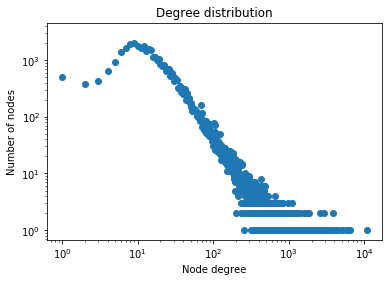

In [109]:
G_org = bipartite.projected_graph(B, organisations_nodes)
print(nx.info(G_org))
plotDegreeDistr(G_org)